#Dragon Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housing_data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
print(housing.columns)

Index(['CRIM', 'ZN ', 'INDUS', 'CHAS', 'NOX', 'RM ', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [6]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [7]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285582,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705146,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.628000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>,
        <Axes: title={'center': 'ZN '}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM '}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

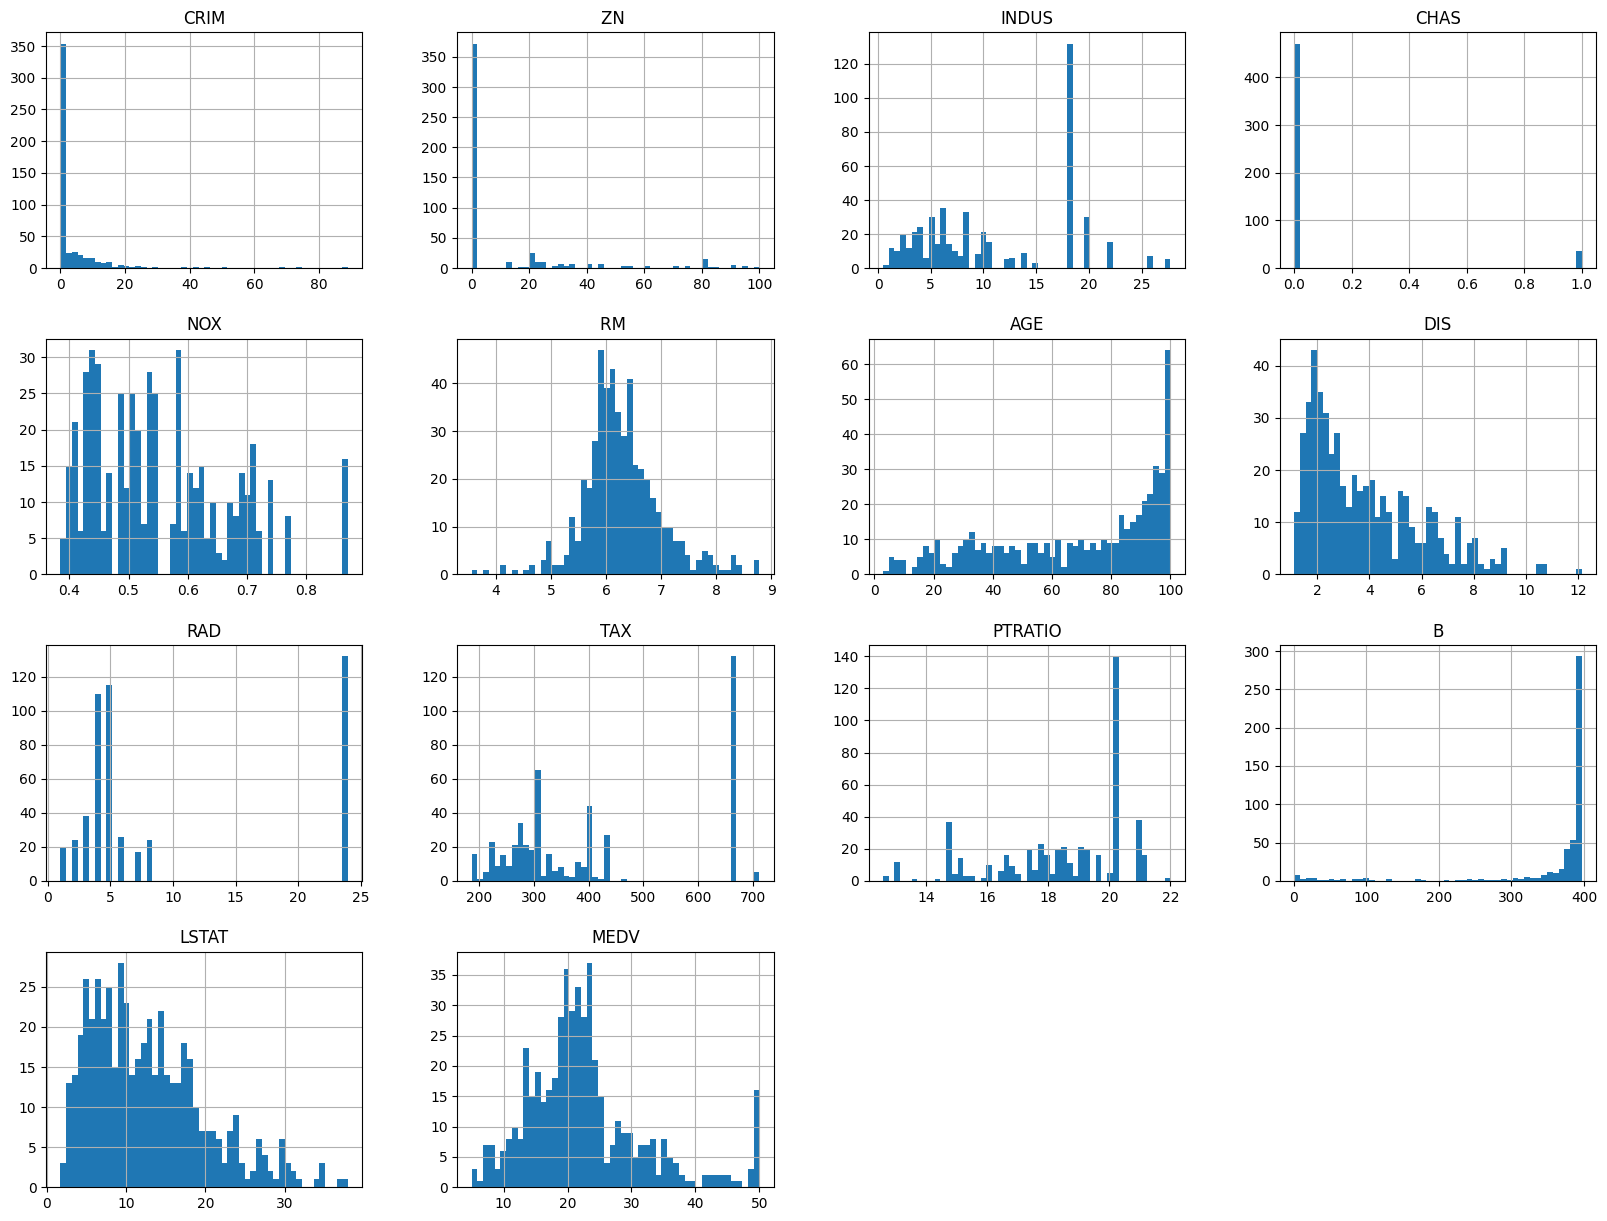

In [10]:
# For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

In [11]:
import numpy as np
# For learning purpose only (below function is already present in the sklearn library)
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [13]:
print("Rows in Train set: ", len(train_set), "Rows in test set: ", len(test_set))

Rows in Train set:  405 Rows in test set:  101


In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280257,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715502,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [17]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       401 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [18]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [19]:
# 95/7

In [20]:
# 376/28
housing = strat_train_set.copy()

## Looking for Correlations

In [21]:
corr_matrix = housing.corr() #used to correlate with pairs (like, if 'a' goes up, will 'b' go up or down)
corr_matrix['MEDV'].sort_values(ascending=False) #for value 1 'b' will be constant no matter what happens to 'a'

MEDV       1.000000
RM         0.680441
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM ', ylabel='MEDV'>,
        <Axes: xlabel='ZN ', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM '>,
        <Axes: xlabel='RM ', ylabel='RM '>,
        <Axes: xlabel='ZN ', ylabel='RM '>,
        <Axes: xlabel='LSTAT', ylabel='RM '>],
       [<Axes: xlabel='MEDV', ylabel='ZN '>,
        <Axes: xlabel='RM ', ylabel='ZN '>,
        <Axes: xlabel='ZN ', ylabel='ZN '>,
        <Axes: xlabel='LSTAT', ylabel='ZN '>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM ', ylabel='LSTAT'>,
        <Axes: xlabel='ZN ', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

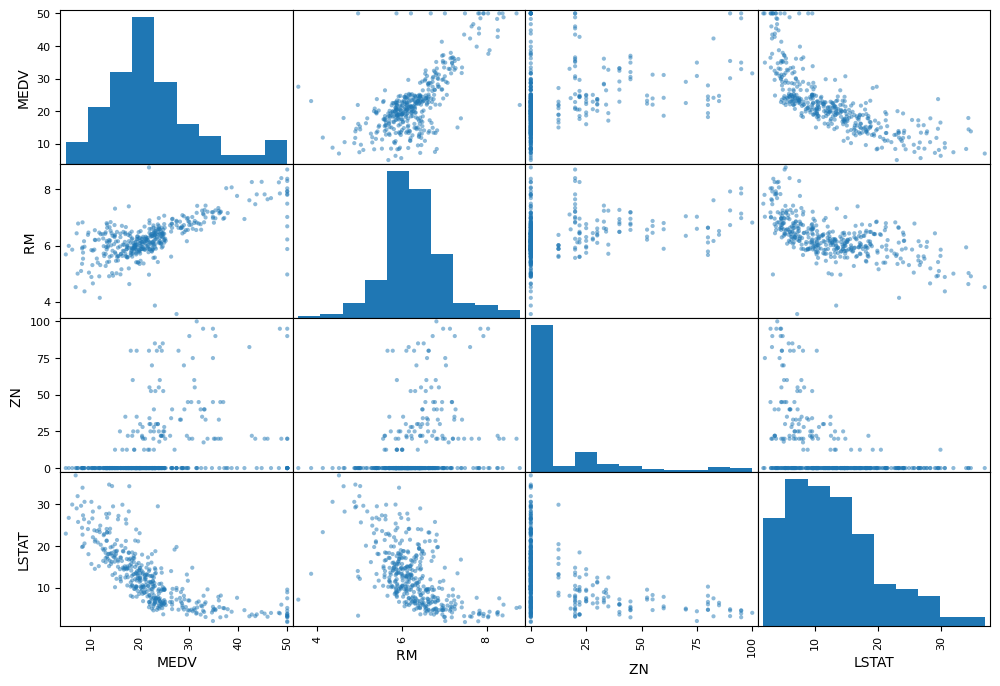

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM ", "ZN ", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12, 8))

<Axes: xlabel='RM ', ylabel='MEDV'>

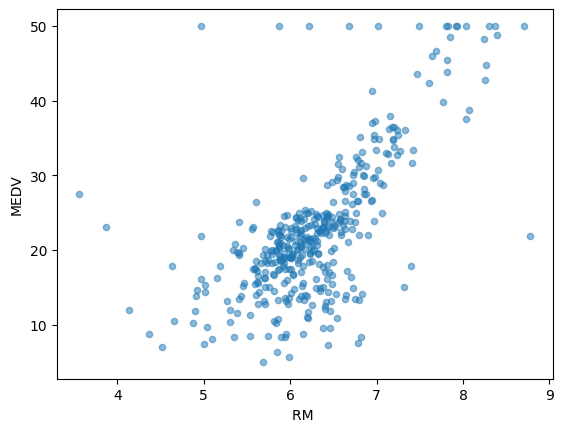

In [23]:
housing.plot(kind="scatter", x = "RM ", y = "MEDV", alpha = 0.5)

## Trying Out Attribute Combinations

In [24]:
housing['TAXRM'] = housing['TAX']/housing['RM ']

In [25]:
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

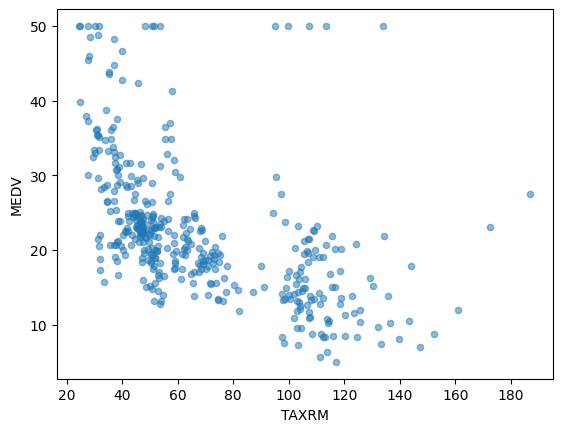

In [26]:
housing.head()

corr_matrix = housing.corr() #used to correlate with pairs (like, if 'a' goes up, will 'b' go up or down)
corr_matrix['MEDV'].sort_values(ascending=False)

housing.plot(kind="scatter", x = "TAXRM", y = "MEDV", alpha = 0.5)



# Missing Attributes

In [27]:
# To take care of missing attributes: You have three options
# 1. Get rid of missing data points
# 2. Get rid of the whole attribute
# 3. Set some value (0 or mean value)

In [28]:
a = housing.dropna(subset=["RM "]) # Option 1
a.shape

(401, 15)

In [29]:
b = housing.drop("RM ", axis = 1) # Option 2 (There will not be any RM column after this)
b.shape

(404, 14)

In [30]:
median = housing["RM "].median()
median

np.float64(6.211)

In [31]:
housing["RM "].fillna(median) # Option 3: Compute median

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM , Length: 404, dtype: float64

In [32]:
housing.shape

(404, 15)

In [33]:
housing.describe() #before we started filling missing attributes (imputing)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280257,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.624253
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715502,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.530417
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.807506
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.666667
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [34]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(strategy = "median")
Imputer.fit(housing)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [35]:
Imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21100000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 2.11500000e+01, 5.48312199e+01])

In [36]:
X = Imputer.transform(housing)


In [37]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [38]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279743,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.529255
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712859,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.432081
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.961287
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


## SciKit Learn Design

Primarily, three types of objects
1. Estimators (ex: Imputer: strategy: median, it fits the datasets according to some parameters)

2. Transformers (It takes input and returns output based on the learnings from fit method, it also has a convenience functions called fit_transform())

3. Predictors (Ex: Linear Regression Model is an example of predictor. fit() and predict() are two common functions. It also gives score function which will evaluate the predictions.
   